In [3]:
import pandas as pd
import numpy as np
file="species_en.xlsx"
x= pd.read_excel(file)
print("Rows and Columns are :",x.shape)
x.head()

Rows and Columns are : (6, 13)


,Sr No,Scientific name,Etymology,Common name,Habitat,Phenology,Identification Characters,Leaf type,Fruit Type,Seed Germination,Pest,Image,Video
0,1,Aleurites moluccana,Aleurites is from Greek aleuron meaning “flour...,Ai-Kami,"Common from coast to mid-hills in Timor-Leste,...",Throughout the Year,"A medium–large tree; leaves alternate, large, ...",Simple,Drupe,Collect brown mature fruits from the tree or d...,"For candlenut, the most immediate nursery thre...",https://deakin365.sharepoint.com/:f:/r/sites/C...,NaN
1,2,Tectona grandis,Tectona comes from Greek téktōn “carpenter/bui...,Ai-Teka,Mostly planted and sometimes naturalised on dr...,Flowering: June to September; Fruiting: Novemb...,"A large, deciduous tree; leaves very large, op...",Simple,Drupe,"Collect mature, dry fruits; remove the outer s...",Termites are the main stem problem in teak; th...,https://deakin365.sharepoint.com/:f:/r/sites/C...,NaN
2,3,Toona ciliata,Toona is from the Indian vernacular name “toon...,Ai-Saria,it grows along moist streams and ravines on we...,Flowering: March - May; Fruiting: July - August,"A tall, deciduous tree; trunk often buttresse...",Pinnately compound (single),Capsule,"Collect ripe, fully mature fruits from the tre...",Young toon (Toona ciliata) often suffers from ...,https://deakin365.sharepoint.com/:f:/r/sites/C...,NaN
3,4,Sterculia foetida,"Sterculia derives from Latin Sterculius, the R...",Ai-nitas,"A lowland tree of hot, dry coastal plains and ...","Flowering: February to March, Fruiting: Januar...","A large, straight, deciduous tree; bark smooth...",Palmately compound,Follicle,Collect mature red fruit and split the fruit t...,"In nurseries of Sterculia foetida, the main pr...",https://deakin365.sharepoint.com/:f:/r/sites/C...,NaN
4,5,Albizia lebbeck,"Albizia honors Filippo degli Albizzi, who intr...",Ai-Samatuku,The species grows along hilly roadsides at low...,Flowering: September–November; Fruiting: May–July,"A medium–large, deciduous tree; bark grey, fis...",Pinnately compound (double),Pod,"Collect pods when they’re dry, light brown, an...","In nurseries, Albizia seedlings often die from...",https://deakin365.sharepoint.com/:f:/r/sites/C...,NaN


In [4]:
df = x.copy()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].replace(["", "nan", "NaN", "None"], np.nan)

df.dropna(how="all", inplace=True)
df.drop_duplicates(inplace=True)

print("\nAfter cleaning the new shape:", df.shape)

print("\nMissing values based on columns:")
print(df.isna().sum())

if "scientific_name" in df.columns:
    dup = df["scientific_name"].duplicated().sum()
    print(f"\nDuplicate scientific_name values: {dup}")

print("\nUnique values:")
for col in ["Scientific name", "Common name", "Habitat", "Leaf type", "Fruit Type"]:
    if col in df.columns:
        print(f"{col} → {df[col].nunique()} unique values")

df.to_excel("species_en_cleaned.xlsx", index=False)
print("\nSaved the file as species_en_cleaned.xlsx")



After cleaning the new shape: (6, 13)

Missing values based on columns:
Sr No                        0
Scientific name              0
Etymology                    0
Common name                  0
Habitat                      0
Phenology                    0
Identification Characters    0
Leaf type                    0
Fruit Type                   0
Seed Germination             0
Pest                         0
Image                        0
Video                        6
dtype: int64

Unique values:
Scientific name → 6 unique values
Common name → 6 unique values
Habitat → 6 unique values
Leaf type → 5 unique values
Fruit Type → 4 unique values

Saved the file as species_en.xlsx


In [5]:
if "Scientific name" in x.columns:
    dup_sci = x["Scientific name"].duplicated(keep=False)
    num_dup_sci = dup_sci.sum()
    print(f"\n Number of duplicated Scientific name values: {num_dup_sci}")
    if num_dup_sci > 0:
        print(x.loc[dup_sci, ["Scientific name"]].sort_values("Scientific name").head(20))

critical_cols = ["Scientific name", "Common name", "Habitat", "Leaf type"]

for col in critical_cols:
    if col in x.columns:
        num_missing = x[col].isna().sum()
        print(f" {col}: {num_missing} missing values")
        


 Number of duplicated Scientific name values: 0
 Scientific name: 0 missing values
 Common name: 0 missing values
 Habitat: 0 missing values
 Leaf type: 0 missing values


In [10]:
text_long = ["Identification Characters", "Phenology", "Etymology"]

for col in text_long:
    if col in x.columns:
        lengths = x[col].dropna().astype(str).str.len()
        print(f"\ntext length statistics for {col}:")
        print("  Mean is :", lengths.mean())
        print("  Min is :", lengths.min())
        print("  Max is :", lengths.max())


text length statistics for Identification Characters:
  Mean is : 364.0
  Min is : 307
  Max is : 426

text length statistics for Phenology:
  Mean is : 58.833333333333336
  Min is : 19
  Max is : 133

text length statistics for Etymology:
  Mean is : 135.83333333333334
  Min is : 116
  Max is : 156


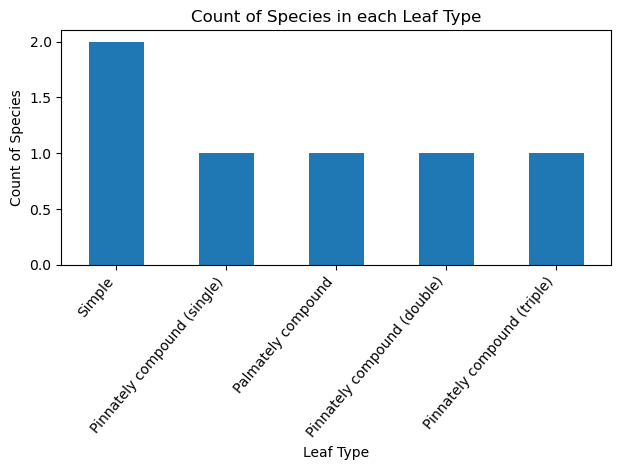

In [18]:
import matplotlib.pyplot as plt

if "Leaf type" in x.columns:
    leaf_counts = x["Leaf type"].value_counts().sort_values(ascending=False)

    plt.figure()
    leaf_counts.plot(kind="bar")
    plt.title("Count of Species in each Leaf Type")
    plt.xlabel("Leaf Type")
    plt.ylabel("Count of Species")
    plt.xticks(rotation=50, ha="right")
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'Leaf type' not found.")


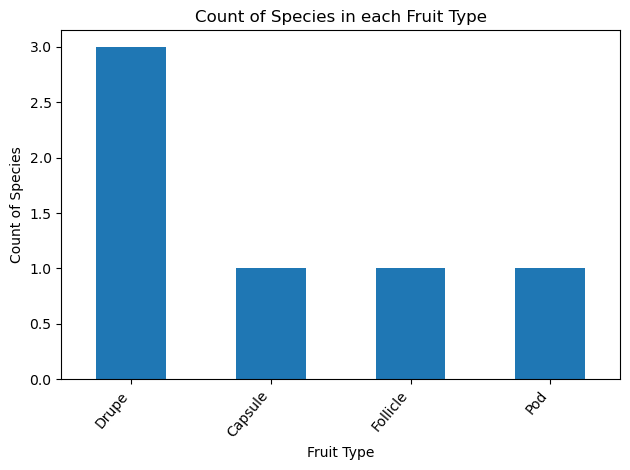

In [20]:
if "Fruit Type" in x.columns:
    fruit_counts = x["Fruit Type"].value_counts().sort_values(ascending=False)

    plt.figure()
    fruit_counts.plot(kind="bar")
    plt.title("Count of Species in each Fruit Type")
    plt.xlabel("Fruit Type")
    plt.ylabel("Count of Species")
    plt.xticks(rotation=50, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Fruit Type' not found.")
